In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visualizations
plt.style.use('seaborn-v0_8')  # Updated style name
sns.set_theme()  # This will set a nice default theme

In [2]:
# Read the CSV file
df = pd.read_csv('../data/standings_fixed.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     133 non-null    float64
 1   Who      135 non-null    object 
 2   Solved   133 non-null    float64
 3   Penalty  133 non-null    float64
 4   A        128 non-null    object 
 5   B        122 non-null    object 
 6   C        72 non-null     object 
 7   D        3 non-null      float64
 8   E        36 non-null     object 
 9   F        24 non-null     object 
 10  G        116 non-null    object 
 11  H        53 non-null     object 
 12  I        52 non-null     object 
 13  J        12 non-null     object 
 14  K        107 non-null    object 
 15  L        7 non-null      object 
 16  M        93 non-null     object 
 17  N        2 non-null      float64
 18  O        125 non-null    object 
 19  P        11 non-null     object 
dtypes: float64(5), object(15)
memory usage: 

,Rank,Who,Solved,Penalty,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1.0,048. WHOAMI Final Battle: MinaRagy06- Abdelmag...,13.0,1062.0,+00:14,+00:14,+00:31,NaN,+02:13,+102:21,+201:04,+01:04,+01:13,+01:48,+00:36,+03:41,+01:01,NaN,+100:22,NaN
1,2.0,003. Katkoten W Tmra: Moatazoleq- M0N,12.0,1207.0,+00:25,+00:25,+01:04,NaN,+02:52,+02:52,+301:36,+01:37,+02:33,+02:34,+00:19,NaN,+101:51,NaN,+00:39,NaN
2,3.0,043. 50 Green Jits: 3mara- SirPh,12.0,1335.0,+00:15,+00:14,+101:53,NaN,+02:47,+102:56,+01:32,+701:32,+02:13,+03:41,+00:29,NaN,+01:11,NaN,+100:12,NaN
3,4.0,059. Timon w Pumbaa: Amigoo- Sersawy,11.0,904.0,+00:27,+00:27,+01:50,NaN,+02:31,+202:51,+00:09,+201:07,+02:38,NaN,+00:22,NaN,+00:49,NaN,+00:33,NaN
4,5.0,005. 2-SAD: _ahmed_tawfik_- ahmed.elbakly,11.0,923.0,+200:24,+00:24,+101:34,NaN,+02:05,+02:11,+100:45,+101:46,+02:36,NaN,+00:17,NaN,+01:10,NaN,+00:31,NaN


In [3]:
# Calculate basic statistics
print("Total number of teams:", len(df))
print("\nNumber of problems solved distribution:")
print(df['Solved'].value_counts().sort_index())

# Calculate mean and median problems solved
print(f"\nMean problems solved: {df['Solved'].mean():.2f}")
print(f"Median problems solved: {df['Solved'].median():.2f}")

Total number of teams: 135

Number of problems solved distribution:
Solved
0.0     12
1.0      3
2.0      6
3.0     11
4.0     16
5.0      9
6.0     20
7.0     14
8.0     14
9.0     13
10.0     3
11.0     9
12.0     2
13.0     1
Name: count, dtype: int64

Mean problems solved: 5.79
Median problems solved: 6.00


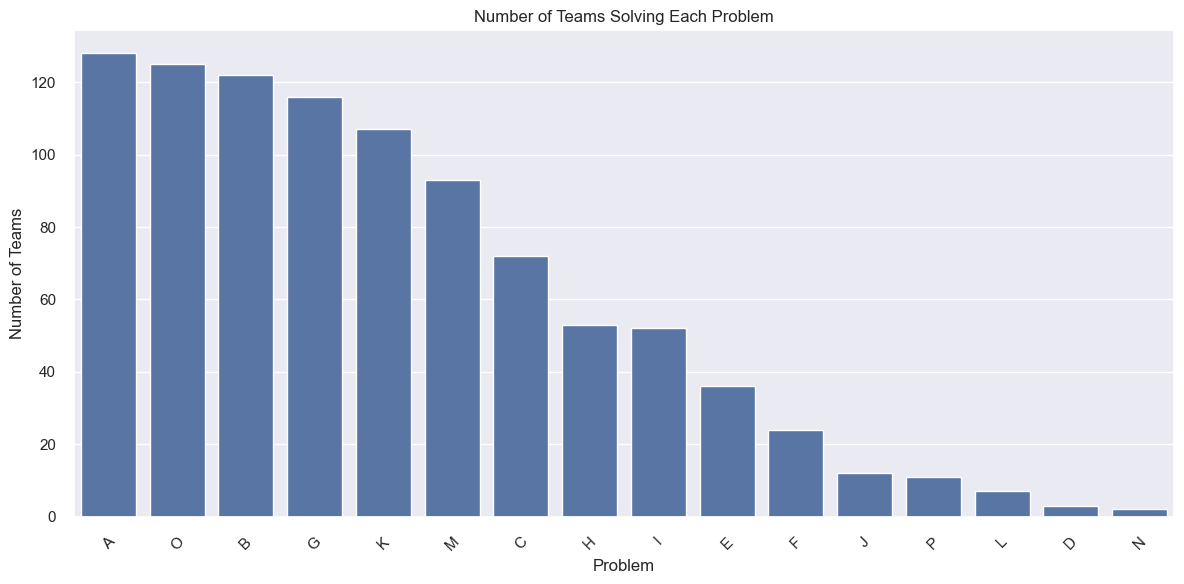

In [4]:
# Get problem columns (A through P)
problem_cols = [col for col in df.columns if col in 'ABCDEFGHIJKLMNOP']

# Calculate number of teams that solved each problem
problem_stats = pd.DataFrame({
    'Problem': problem_cols,
    'Solved': [df[col].notna().sum() for col in problem_cols],
    'Attempted': [df[col].notna().sum() for col in problem_cols]
})

# Sort by number of solves
problem_stats = problem_stats.sort_values('Solved', ascending=False)

# Plot problem difficulty
plt.figure(figsize=(12, 6))
sns.barplot(data=problem_stats, x='Problem', y='Solved')
plt.title('Number of Teams Solving Each Problem')
plt.xlabel('Problem')
plt.ylabel('Number of Teams')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

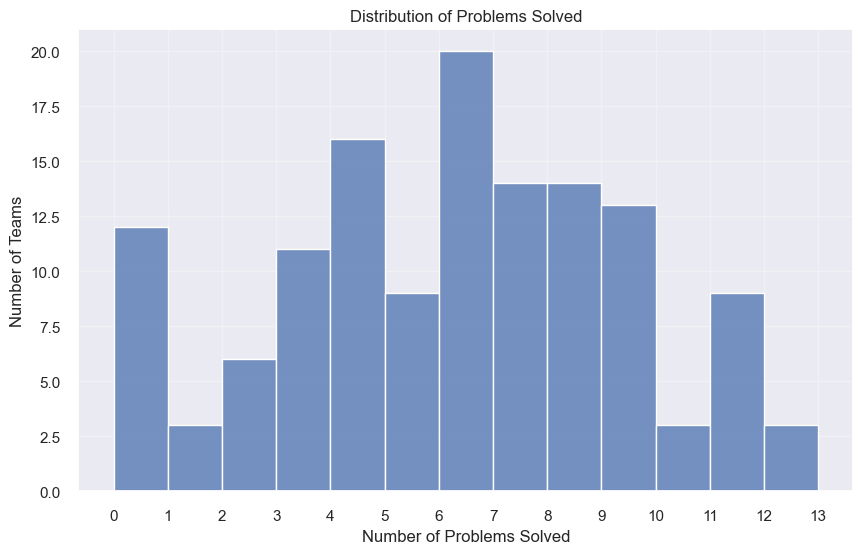

In [5]:
# Plot distribution of problems solved
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Solved', bins=range(0, 14))
plt.title('Distribution of Problems Solved')
plt.xlabel('Number of Problems Solved')
plt.ylabel('Number of Teams')
plt.xticks(range(0, 14))
plt.grid(True, alpha=0.3)
plt.show()

Top 10 Teams:
                                                 Who  Solved  Penalty
0  048. WHOAMI Final Battle: MinaRagy06- Abdelmag...    13.0   1062.0
1              003. Katkoten W Tmra: Moatazoleq- M0N    12.0   1207.0
2                   043. 50 Green Jits: 3mara- SirPh    12.0   1335.0
3               059. Timon w Pumbaa: Amigoo- Sersawy    11.0    904.0
4          005. 2-SAD: _ahmed_tawfik_- ahmed.elbakly    11.0    923.0
5                035. Strangers: 3bkarm- Eslam_Saleh    11.0    996.0
6        070. Heisendoksh: Kareem_Elgoker- _Sherbiny    11.0   1048.0
7  076. مؤمن بالله وانا ادهم: momen159- Mysteriou...    11.0   1184.0
8                          022. 4SITP: Mr.Pie- yahia    11.0   1195.0
9               067. Maharat Da3: Chinese_- SkillZz_    11.0   1250.0


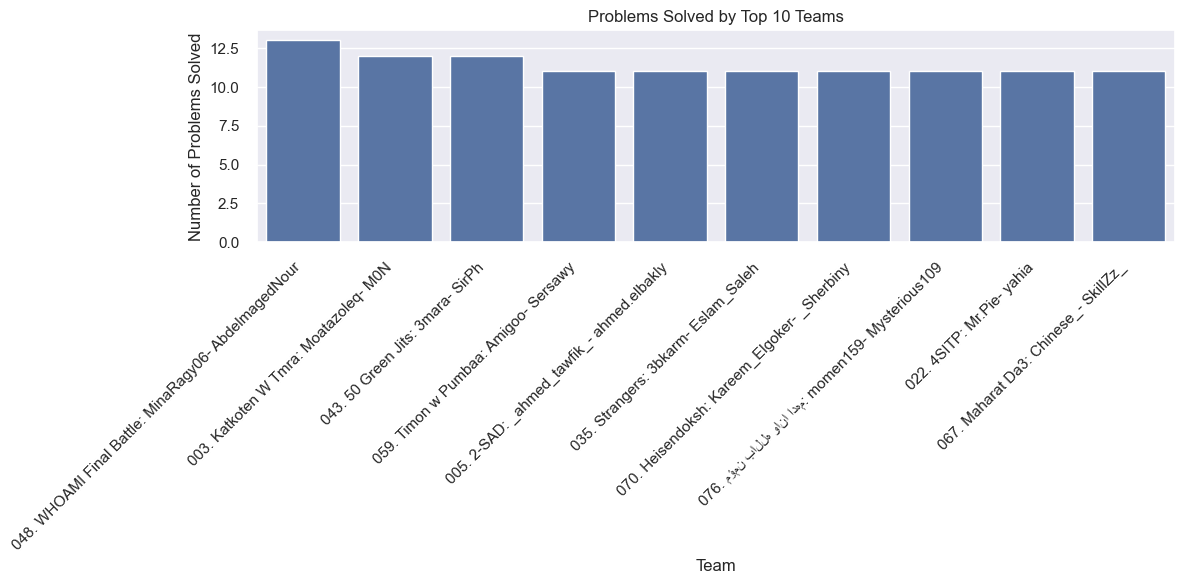

In [7]:
# Display top 10 teams
print("Top 10 Teams:")
top_10 = df.head(10)[['Who', 'Solved', 'Penalty']]
print(top_10)

# Plot problems solved by top 10 teams
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='Who', y='Solved')
plt.title('Problems Solved by Top 10 Teams')
plt.xlabel('Team')
plt.ylabel('Number of Problems Solved')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#! remove name and add team rank

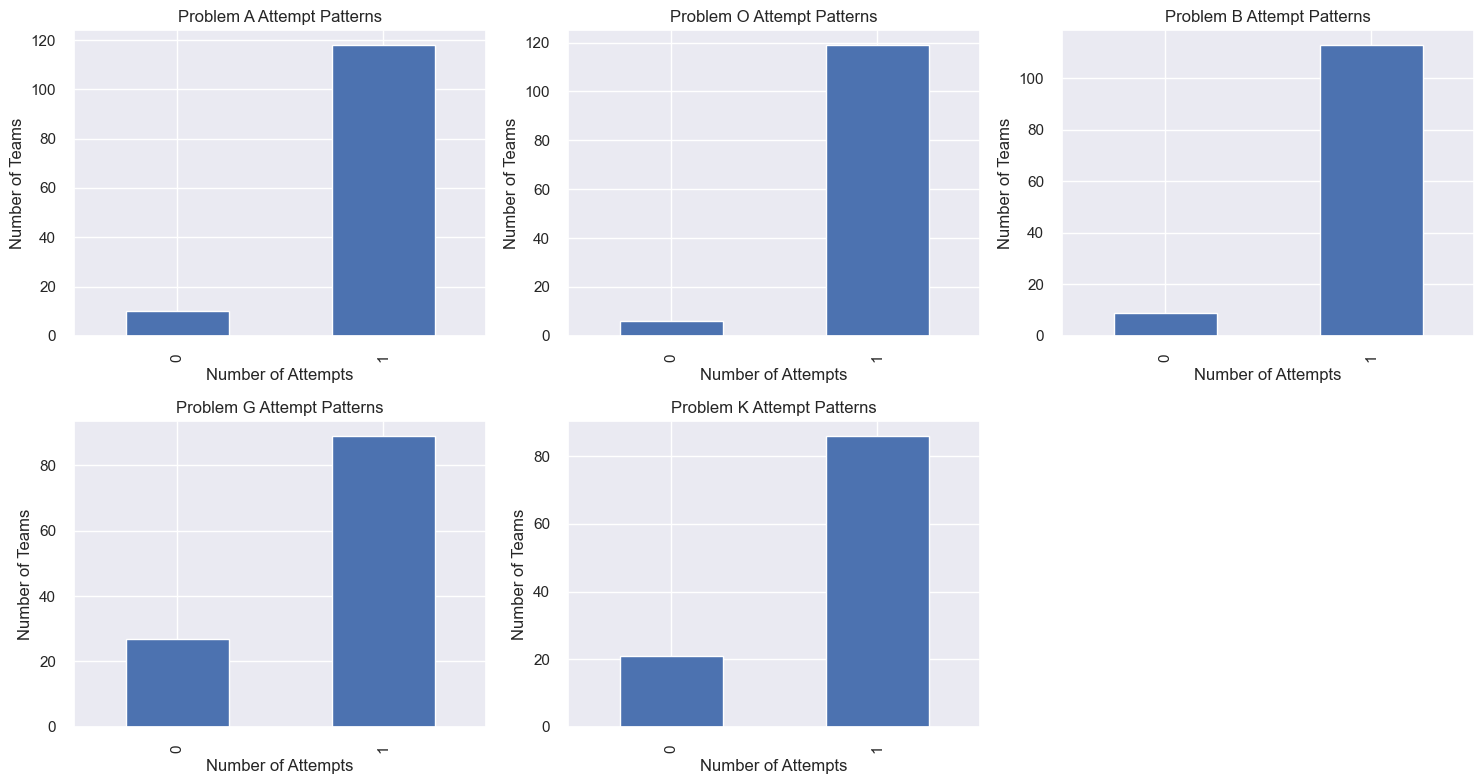

In [8]:
# Calculate attempt patterns for each problem
attempt_patterns = {}
for col in problem_cols:
    attempts = df[col].dropna()
    if not attempts.empty:
        # Convert all values to strings first
        attempts = attempts.astype(str)
        # Count number of attempts (indicated by + in the time)
        attempt_counts = attempts.str.count('\\+')
        attempt_patterns[col] = attempt_counts.value_counts().sort_index()

# Plot attempt patterns for top 5 most solved problems
top_5_problems = problem_stats.head(5)['Problem'].tolist()
plt.figure(figsize=(15, 8))

for i, problem in enumerate(top_5_problems, 1):
    plt.subplot(2, 3, i)
    if problem in attempt_patterns:
        attempt_patterns[problem].plot(kind='bar')
        plt.title(f'Problem {problem} Attempt Patterns')
        plt.xlabel('Number of Attempts')
        plt.ylabel('Number of Teams')

plt.tight_layout()
plt.show()

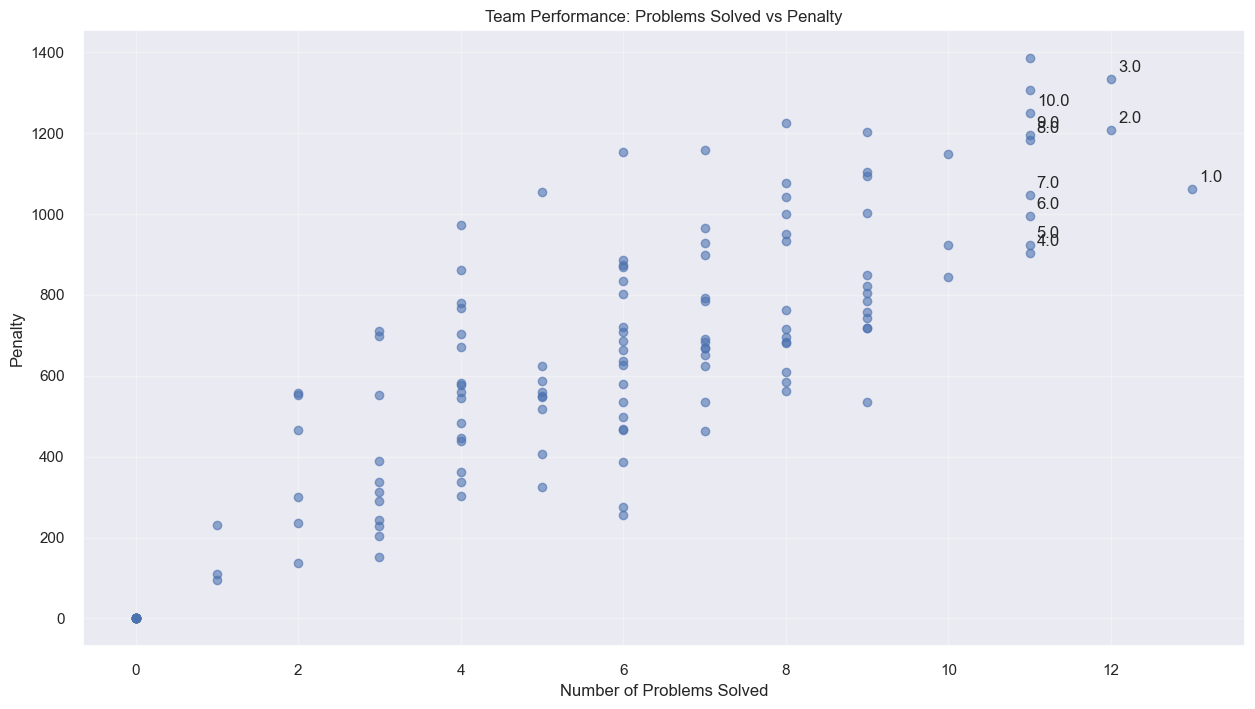

In [9]:
# Create a scatter plot of problems solved vs penalty with team names
plt.figure(figsize=(15, 8))
plt.scatter(df['Solved'], df['Penalty'], alpha=0.6)

# Add team names for top 10 teams
for i, row in df.head(10).iterrows():
    plt.annotate(row['Rank'], 
                (row['Solved'], row['Penalty']),
                xytext=(5, 5), 
                textcoords='offset points')

plt.title('Team Performance: Problems Solved vs Penalty')
plt.xlabel('Number of Problems Solved')
plt.ylabel('Penalty')
plt.grid(True, alpha=0.3)
plt.show()